In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as py
import sklearn
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\niraj\OneDrive\Desktop\DA projects\ML Linear Regression\Ecommerce Customers.txt")

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.tail()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


In [5]:
df.shape

(500, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


<AxesSubplot:>

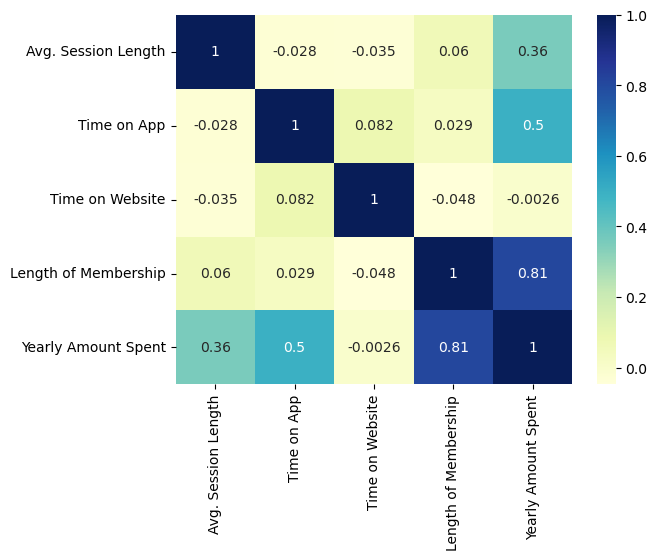

In [8]:
sns.heatmap(df.corr(),cmap = "YlGnBu",annot = True)

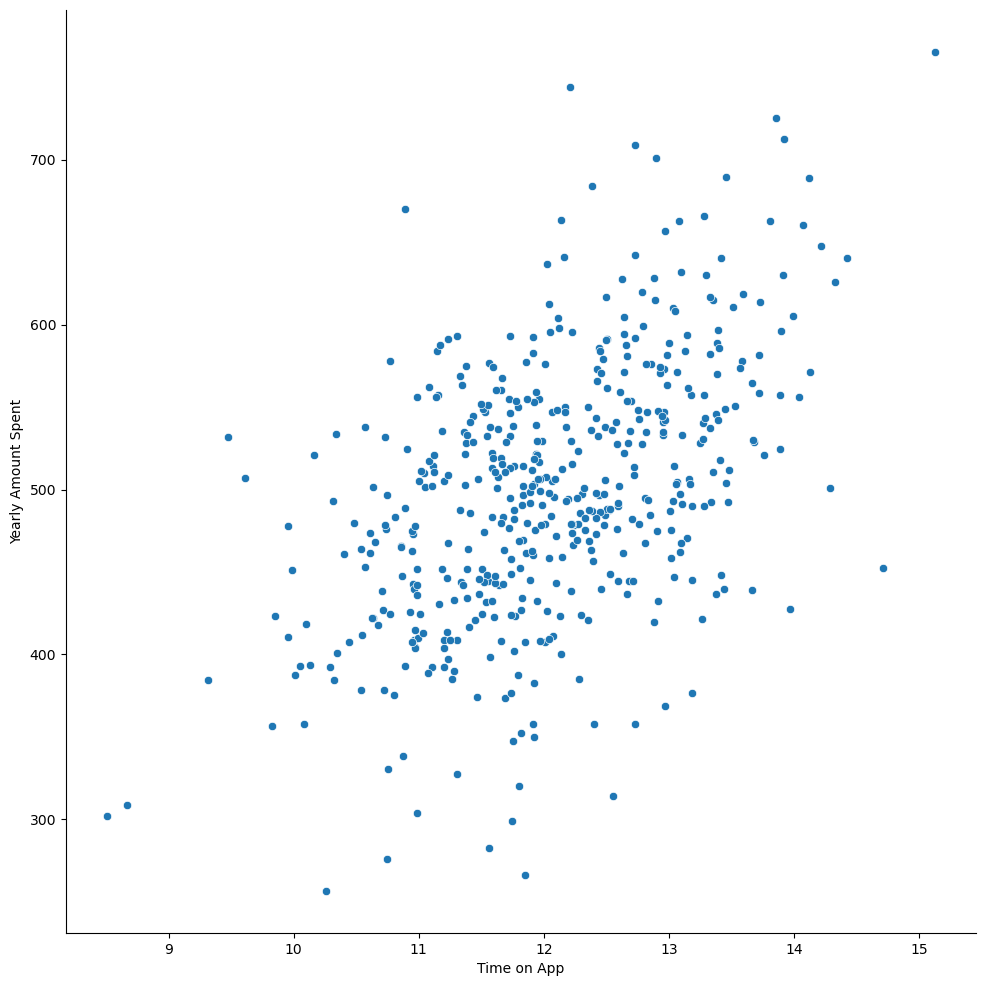

In [9]:
#Visualisations
#sns.set_palette("GnBu_d")
#sns.set_style("whitegrid")
sns.pairplot(data = df, x_vars = "Time on App",y_vars = "Yearly Amount Spent",height = 10)

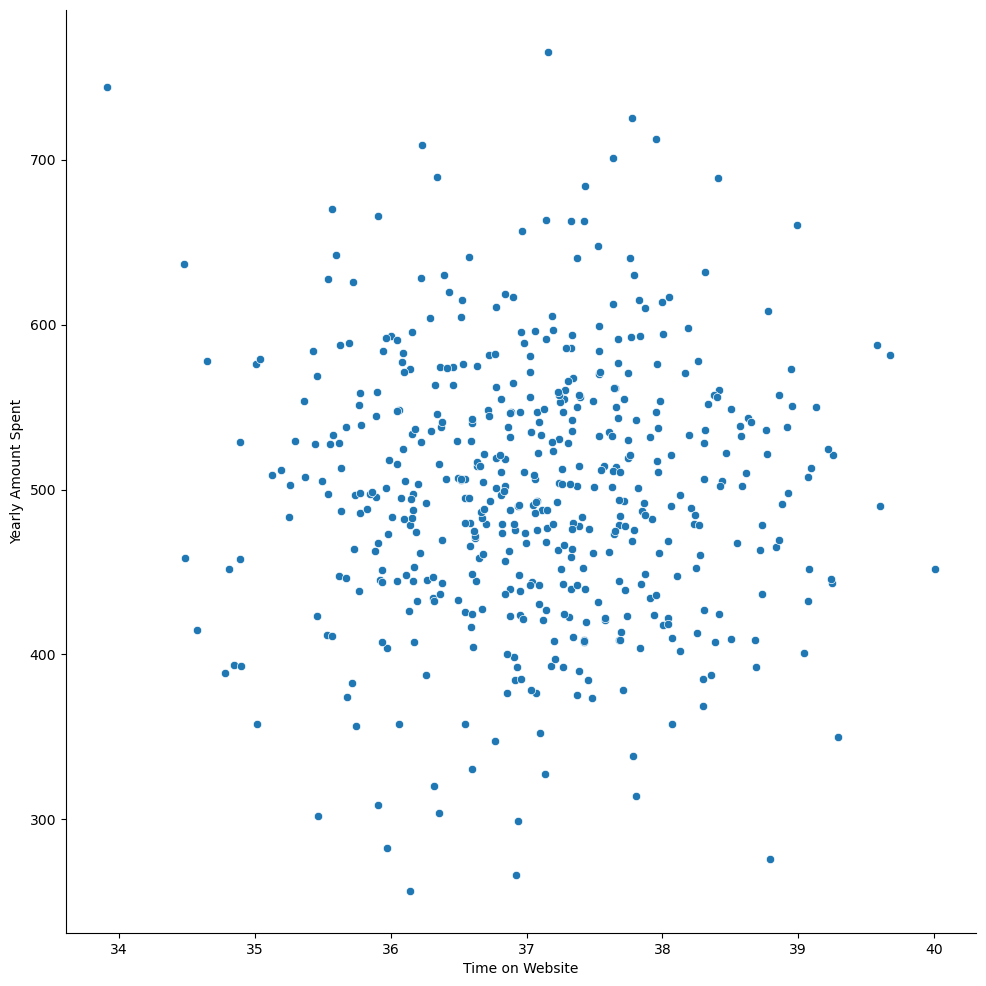

In [10]:
sns.pairplot(data = df, x_vars = "Time on Website",y_vars = "Yearly Amount Spent",height = 10)

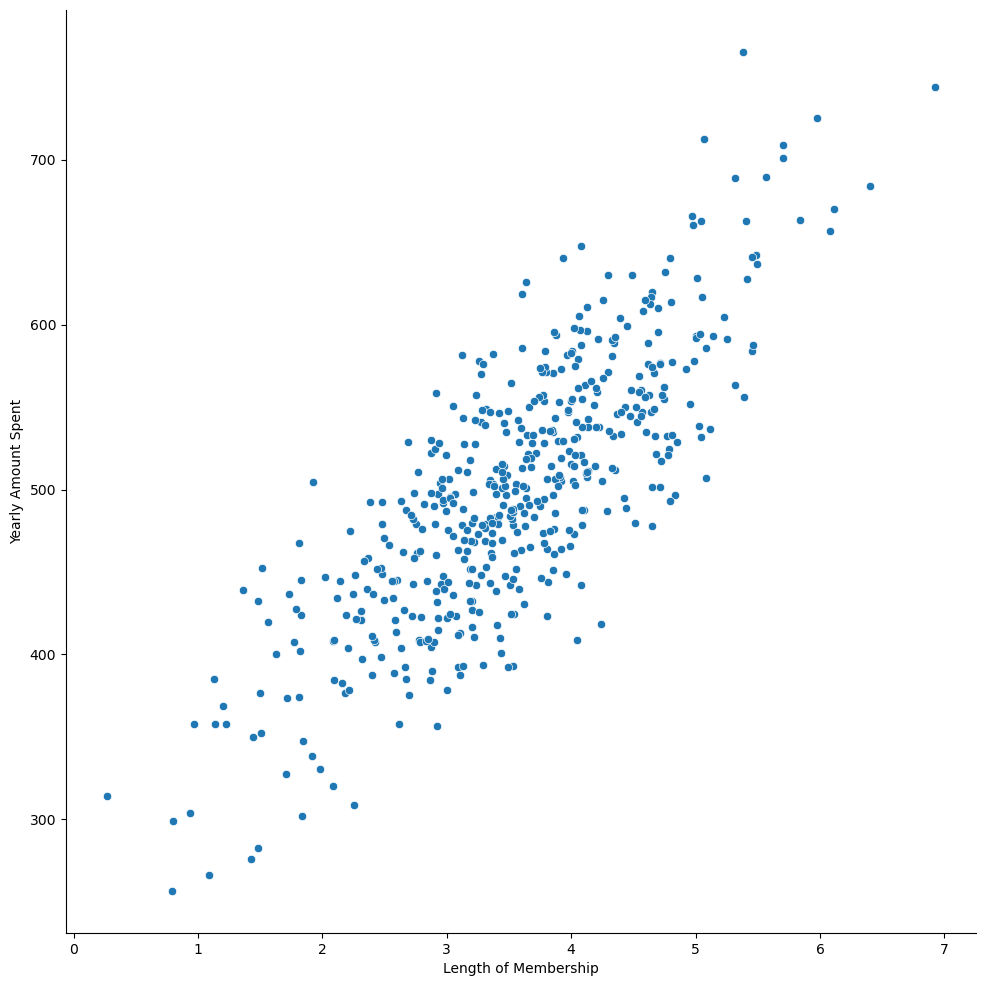

In [11]:
sns.pairplot(data = df, x_vars = "Length of Membership",y_vars = "Yearly Amount Spent",height = 10)

In [12]:
#Linear regression implementation
X = df[["Avg. Session Length","Time on App","Time on Website","Length of Membership"]]
Y = df["Yearly Amount Spent"]


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 68)


In [14]:
X_train.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
155,32.449522,13.457725,37.238806,2.941411
237,31.625360,13.187911,37.067090,1.494311
36,31.721652,11.755024,36.765722,1.847370
274,31.818617,11.226546,35.669935,3.755869
287,33.908565,12.914847,39.068864,1.482360


In [15]:
X_train.shape
X_test.shape

(150, 4)

In [16]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

Text(0, 0.5, 'Predicted Y')

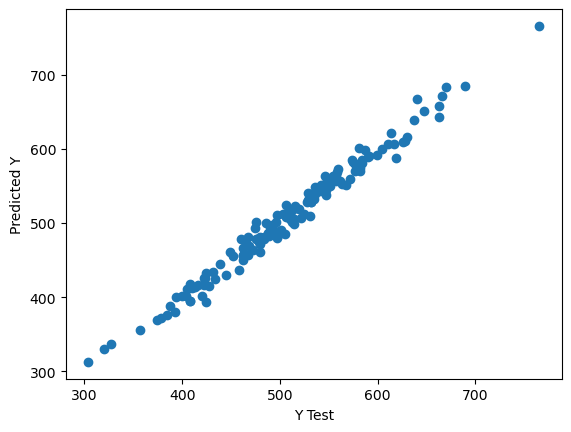

In [19]:
predictions = lm.predict( X_test)
py.scatter(Y_test,predictions)
py.xlabel('Y Test')
py.ylabel('Predicted Y')

In [20]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.983640
Time on App,38.524357
Time on Website,0.635251
Length of Membership,61.999851


In [23]:
print(lm.coef_)

[25.98363951 38.52435721  0.63525065 61.99985125]


In [22]:
print(lm.intercept_)

-1066.664073267093


In [26]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))


MAE: 8.258467178784034
MSE: 107.82089731186811
RMSE: 10.383684187795202


In [32]:
from sklearn.metrics import r2_score

In [33]:
Y_train_pred = lm.predict(X_train)

In [35]:
Y_test_pred = lm.predict(X_test)



In [36]:
print(r2_score(Y_train,Y_train_pred))

0.9848655867576468


In [37]:
print(r2_score(Y_test,Y_test_pred))

0.982404947009439
